<a href="https://colab.research.google.com/github/drtamakloe/hello-world/blob/master/Copy_of_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction



-   [https://git.io/ml2019-9](https://git.io/ml2019-9)
-   Today's lecture covers training, testing and ensemble classifiers
-   We will further explore the bias-variance tradeoff and see some ways
    to deal with it
-   As before, the setup is we have some input in $\mathbb{R}^n$ with
    known labels
-   We want to find a function that will send the known inputs to the
    correct label and generalize to unseen data
    -   Generalize = the procedure should correctly classify unseen input



## Some Data



### :BMCOL:



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/877c932cb1d90111683e615d3a618a2f2745f294.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/84aee0fcaba34d1412d38adc0756d58fd851e258.png?raw=1)



### :BMCOL:



-   Some synthetic data (i.e. created artificially) we will use to illustrate today's concepts
-   Has 3 categories with 2 variables, lots of overlaps
-   Running a decision tree over the data gives a highly overfitted result



## Training and Testing



### :BMCOL:



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/c7e86d2397e7b6dfe1f41c842f1c392514862926.png?raw=1)
![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/effa9a8b98473d5c6092f241bfae739eaeabd2b5.png?raw=1)

    ntrain = 200 # total data has 250 datapoints
    x, y = X[:ntrain], Y[:ntrain] # take 200 for training
    tx, ty = X[ntrain:], Y[ntrain:] # take 50 for testing
    tree = DecisionTreeClassifier(); _ = tree.fit(x,y)



### :BMCOL:



-   In order to understand the bias-variance trade off, we need some way to see if we're overfitting the data
-   Without a priori knowledge of the data distribution, we need some way to test this, using the data itself
-   We can do this by setting aside some portion of the data, the testing set, and only train on the remaining data, the training set
-   If we take 80% of the previous page data and fit the tree, overlaying the output shows clear overtraining (e.g. blue in cut out blocks of green)



## Bias vs Variance



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/3c56c4d1607d537fef5fc820b08790dd47d839a8.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/29fed7a2e0c502b753ab96cc83f96b0bb18cee12.png?raw=1)

-   We can see this particularly clearly by plotting some metrics
    against the depth of the tree (= complexity of model)
-   Accuracy: fraction of data classified correctly
-   MSE: mean squared error, for our tree, use the the average of
    `(1-predict_proba(x))**2` taking `proba` of the known true labels `y`
-   As we increase the max depth, the training set gets more accurate, 
    the test set diverges, and becomes less accurate, this is overfitting
    -   This is a general feature, the point where the training and
        testing diverge is usually the best point to take when
        *hyperparameter* fitting



## Controlling Variance: Bootstrap Datasets



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/bootstrap.png?raw=1)

-   A *bootstrapped dataset* is created by taking an old dataset, and using it to build a new dataset
-   We take datapoints at random from the old dataset *with replacement*, until we have a dataset the same size as the original
    -   *with replacement*: that is, we pick a datapoint from a bag of all
        the datapoints, note it down, then put it back in the bag for the
        next time
-   This generates a dataset the same size as the original, but with points possibly repeated
-   These bootstrapped datasets are used in statistics to generate
    model-free estimates of e.g. the approximate variance of the
    estimated mean obtained from the dataset
-   Will we apply the same idea to generate a more generalizable classifier



## Controlling Variance: Ensemble Classifiers; Bagging



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/bagging.png?raw=1)

-   *Ensemble classifiers* combine several separate classifiers into a single output
-   For example, we can create them them by letting each classifier
    *vote* on the output, and taking the winner of the vote as our
    output
    -   We could also, e.g., average the outputs of `predict_proba` and
        classify from there
-   In bagging, we build several classifiers from bootstrapped datasets
    and join them together as an ensemble classifier
-   Basically we use the bootstrapped datasets to develop a new
    classifier which will average out the outliers, smooth the edges
-   Bagging reduces the variance of the classifier (smooth out output)
    at the expense of an increase in the bias (not fitting outliers
    exactly)



## Bagging Decision Trees



-   In sklearn, there is a `BaggingClassifier` in `sklearn.ensemble`,
    which can take some other classifier and create a bagging classifier
-   Here we created a bagging ensemble of `DecisionTreeClassifiers`
-   We can set the parameters of the `DecisionTreeClassifiers` as we like,
    and pass in the numbers of bags to use as `n_estimators`
-   Plots showing accuracy and mse under various hyperparameters
    -   Optimal hyperparameters vary the data, you'll need to explore the space

    from sklearn.ensemble import BaggingClassifier
    tree = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=10)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/3d32d2fdba24aacf2356a1babf989fb918ada710.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/fed311f882068dbbdc041306c41701cd8a6854a9.png?raw=1)



## Example Trees



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/39596e8b2c5596d22042fe33035b233e7efe93e3.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/491023be6f0704026c08404c1704d91bdd571ca3.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/b995dd007b5622cd7956a6ea027d20a8c0639734.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/09fc951d3f29272aae9f75d07bff5f27fcf1c766.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/b5b935fbd898d8f253287ee432ac581c64eacd24.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/6a39e293a4fe191112e24baf0f526cce1c6b4836.png?raw=1)

-   Example bagging outputs, depth 4, with various numbers of trees
-   Compared to a full decision tree, the bagged classifiers smooth out the regions, with less fitting to outliers



## Boosting



-   We can use ensemble classifiers in a different way also, to control bias
-   In Boosting, we start with a weak classifier (barely better than
    random chance), and put them together to form a strong classifier
-   This is done by *weighting* the data for each classifier we train
-   E.g. start with a depth 1 `DecisionTreeClassifier`, weight the
    misclassified data higher, and the correctly classified data lower
-   Train a depth 1 tree on the reweighted data, this gives a different
    tree, since the gini index will be calculated based on the
    *weights*, instead of just taking the number of entries in each bucket
-   This scheme is AdaBoost, there are also other variations, such as
    Gradient boosting, but in all the idea is to take a weak classifier
    and train up an ensemble of strong classifiers



## Boosting



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/boosting.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/boosting_eg.png?raw=1)

-   Left shows a regression task, but the idea is the same, the further
    the curve is from a point, the higher its weighted in the next tree
-   How quickly the weights change are controlled by the `learning_rate`
-   After training, the output is taking as a weighted average of the
    trees, the weight of each tree proportional to the number of
    correctly classified training datapoints it produced
-   Chapter 7 of "Hands-On Machine Learning with Scikit-Learn, Keras,
    and TensorFlow, 2nd Edition" has the details



## Boosting Decision Trees



![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/e1aa74e241cd148f5153fe528d22f23425c68e20.png?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/09-ensembles-drtamakloe/blob/master/.ob-jupyter/5a5ff25e94647cea45ce12ef566193b390e65235.png?raw=1)

-   Various number of depth 1 decision trees trained with AdaBoost
-   If the learning rate is too high, the boosting overcorrects too quickly, and we don't get good testing results
-   With a lower learning rate, the boosting helps us get a more accurate classifier



## Exercises



See the notebook.

We will start with the iris data, then move onto a new dataset.

We will use bagged decision trees to try to classify high-income and
low-income earners, based on US census information.

Start with the iris data, for sepal width and length



In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

iris = pd.read_csv('iris.data', header=None, names=['sl', 'sw', 'pl', 'pw', 'cl'])
X = iris[['sw','sl']].to_numpy()
names, Y = np.unique(iris['cl'], return_inverse=True) # setosa, virginicia eta => 0,1,2
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,Y)

--2019-12-11 13:16:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2019-12-11 13:16:19 (103 MB/s) - ‘iris.data’ saved [4551/4551]

--2019-12-11 13:16:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: ‘iris.names’

iris.names          100%[===================>]   2.93K  --.-KB/s    in 0s      

2019-12-11 13:16:22 (7

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

I've given you a helper function which can `draw` the 2D plots. Make
plots for a basic `DecisionTreeClassifier` and a bagging classifier
made from many, many DecisionTreeClassifiers (several thousand), and
an `AdaBoostClassifier` of many depth 1 DecisionTreeClassifiers. How
do the boundaries compare?



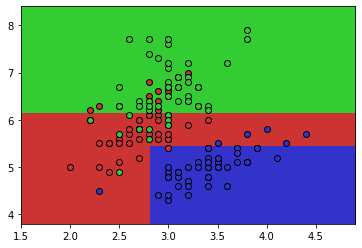

In [0]:
def draw(X,Y, tree, label=''):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  # Pick some colors for the iris'
  myse,myvi,myve = (0.2,0.2,0.8),(0.2,0.8,0.2),(0.8,0.2,0.2)
  cmap = [myse, myve, myvi] # based on the names array
  x,y = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
  pred = tree.predict(np.column_stack([x.reshape(-1), y.reshape(-1)]))
  z = np.array([cmap[p] for p in pred]).reshape((200,200,3))
  # Put the result into a color plot
  plt.imshow(z, extent=(x_min,x_max,y_min,y_max), origin='bottom-left', aspect='auto')
  # Plot also the training points
  X0 = X[Y==0]; X1 = X[Y==1]; X2 = X[Y==2]
  _ = plt.scatter(X0[:,0], X0[:,1], c=[myse], edgecolor='k')
  _ = plt.scatter(X1[:,0], X1[:,1], c=[myve], edgecolor='k')
  _ = plt.scatter(X2[:,0], X2[:,1], c=[myvi], edgecolor='k')
  plt.title(label)
  plt.show()

# Your code here
draw(X, Y, tree)

In [0]:
from sklearn.ensemble import BaggingClassifier
tree1 = BaggingClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=1000)

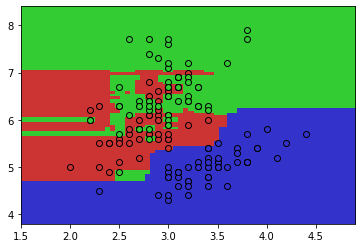

In [0]:
tree1.fit(X,Y)
draw(X, Y, tree1)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
tree2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10000)

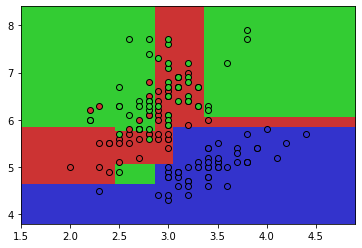

In [0]:
tree2.fit(X,Y)
draw(X, Y, tree2)

Now, lets look at the adult dataset.

Grab the data, and read the information about it in `adult.names`:



In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!cat adult.names

--2019-12-11 13:13:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test’

adult.test          100%[===================>]   1.91M  1.95MB/s    in 1.0s    

2019-12-11 13:13:11 (1.95 MB/s) - ‘adult.test’ saved [2003153/2003153]

--2019-12-11 13:13:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  3.38MB/s    in 1.1s    

2019

The goal is to classify high-income (here meaning >50k in 1994 USD,
inflation destroys value), and low-income earners (<50k). There are
lots of categorical information in the data, which we need to convert
from strings to integers. We can use `pd.factorize` to overwrite the
data, it will make a new integer for each string it sees. This is done
below for the `adult`. There is also already an explicit `test` set
which we also process:

    import pandas as pd
    import matplotlib.pyplot as plt
    
    names = ["age", "workclass", "fnlwgt", "education", "education-num",
             "marital-status", "occupation", "relationship", "race", "sex",
             "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
    adult = pd.read_csv('adult.data', header=None, names=names, index_col=False)
    test = pd.read_csv('adult.test', header=None, names=names, index_col=False, skiprows=1)
    print(adult[:10].to_string())
    for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
        adult[column] = pd.factorize(adult[column])[0]
        test[column] = pd.factorize(test[column])[0]
    
    print()
    print(adult[:10].to_string())

The target column is the 'income' column, the last column. Lets split
it out into numpy arrays `x` and `y`, and also a testing `tx` and
`ty`:



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
 
names = ["age", "workclass", "fnlwgt", "education", "education-num",
         "marital-status", "occupation", "relationship", "race", "sex",
         "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
adult = pd.read_csv('adult.data', header=None, names=names, index_col=False)
test = pd.read_csv('adult.test', header=None, names=names, index_col=False, skiprows=1)
print(adult[:10].to_string())
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    adult[column] = pd.factorize(adult[column])[0]
    test[column] = pd.factorize(test[column])[0]
 
print()
print(adult[:10].to_string())

   age          workclass  fnlwgt   education  education-num          marital-status          occupation    relationship    race      sex  capital-gain  capital-loss  hours-per-week  native-country  income
0   39          State-gov   77516   Bachelors             13           Never-married        Adm-clerical   Not-in-family   White     Male          2174             0              40   United-States   <=50K
1   50   Self-emp-not-inc   83311   Bachelors             13      Married-civ-spouse     Exec-managerial         Husband   White     Male             0             0              13   United-States   <=50K
2   38            Private  215646     HS-grad              9                Divorced   Handlers-cleaners   Not-in-family   White     Male             0             0              40   United-States   <=50K
3   53            Private  234721        11th              7      Married-civ-spouse   Handlers-cleaners         Husband   Black     Male             0             0           

In [0]:
ntrain = int(len(adult.to_numpy())*0.7)
x, y = adult.to_numpy()[:ntrain, :-1], adult.to_numpy()[:ntrain, -1]
tx, ty = adult.to_numpy()[ntrain:, :-1], adult.to_numpy()[ntrain:, -1]
print(adult.shape)
print(x.shape, y.shape)
print(tx.shape, ty.shape)

(32561, 15)
(22792, 14) (22792,)
(9769, 14) (9769,)


Now we have the data (the hardest part), lets explore using decision
trees to find the high-income earners.

To start with, starting with a depth of 1, make a plot of the accuracy
from `tree.score` of a basic `DecisionTreeClassifier` versus
`max-depth`. Comparing the accuracy for testing and training, at what
depth does the Decision tree start to overtrain? What is the best
training accuracy?

Try also making a plot of the mean-squared error versus depth, it
makes a smoother plot. You can use the following snippet:
`np.sum(np.max(tree.predict_proba(x) - pd.get_dummies(y).to_numpy(),
axis=1)**2) / len(x)`



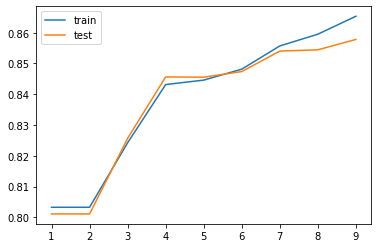

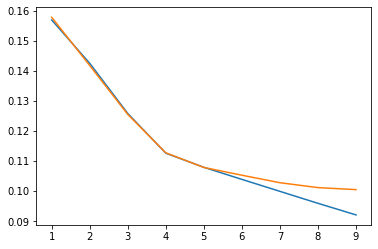

In [0]:
score_list=[]
tscore_list=[]
mse_list=[]
tmse_list=[]
for i in range(1,10):
 nw_tree = DecisionTreeClassifier(max_depth=i)
 nw_tree.fit(x,y)
 score_list.append(nw_tree.score(x,y))
 tscore_list.append(nw_tree.score(tx,ty))
 mse_list.append(np.sum(np.max(nw_tree.predict_proba(x) - pd.get_dummies(y).to_numpy(), axis=1)**2) / len(x))
 tmse_list.append(np.sum(np.max(nw_tree.predict_proba(tx) - pd.get_dummies(ty).to_numpy(), axis=1)**2) / len(tx))
plt.plot(range(1,10),score_list,label="train")
plt.plot(range(1,10),tscore_list,label="test")
plt.legend()
plt.figure()
plt.plot(range(1,10),mse_list)
plt.plot(range(1,10),tmse_list)

In [0]:
x.shape

(22792, 14)

Now, try training a bagged ensemble of decision trees. Can you find a
set of hyperparameters that improves the accuracy of the test set?

Again, plotting max<sub>depth</sub> versus accuracy should help, try increasing
n<sub>estimators</sub> and seeing if you see any difference. In particular, how
does the overtraining point vary with n<sub>estimators</sub>?



n_estimators = 1


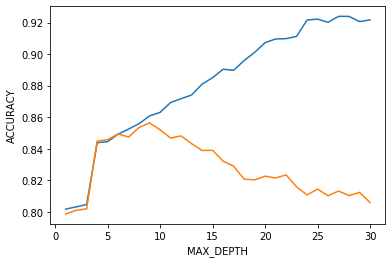

n_estimators = 5


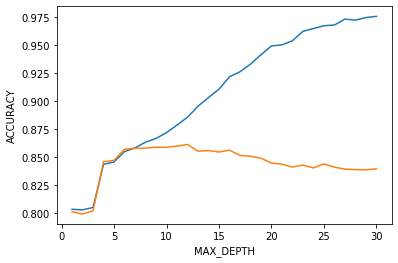

n_estimators = 10


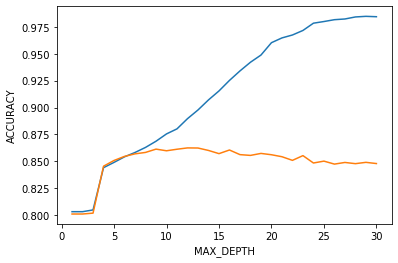

n_estimators = 15


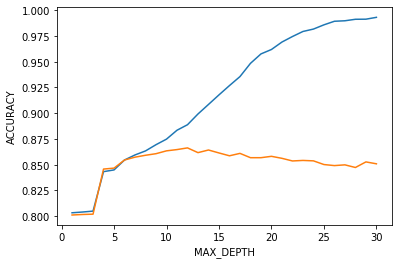

n_estimators = 20


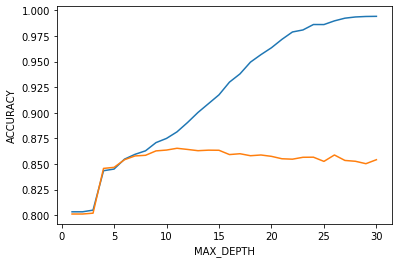

n_estimators = 25


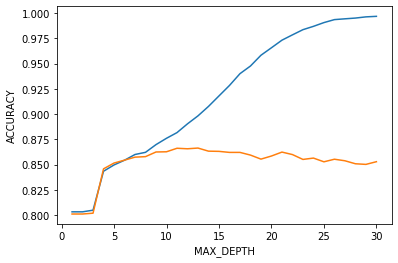

In [0]:
max_depth = 30
n_estimators = [1, 5, 10, 15, 20, 25]

for n in n_estimators:
  score_list=[]
  tscore_list=[]

  for i in range(1, max_depth + 1):

    tree = BaggingClassifier(DecisionTreeClassifier(max_depth=i), n_estimators=n)
    tree.fit(x,y)
    score_list.append(tree.score(x,y))
    tscore_list.append(tree.score(tx,ty))

  train = np.array(score_list)
  test = np.array(tscore_list)
  depth = np.arange(1, max_depth+1)

 
  print('n_estimators = {}'.format(n))
  plt.plot(depth, train)
  plt.plot(depth, test)
  xlab = 'MAX_DEPTH'
  ylab = 'ACCURACY'


  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.show()